In [18]:
%matplotlib inline
%load_ext autoreload
%autoreload
from query_functions import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
!pip install pandas_gbq
!pip install bokeh==2.3.2


[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [20]:
%matplotlib inline
%load_ext autoreload
%autoreload

import sys

sys.path.append('../')
from query_functions import *

# Numpy package is dedicated to simplify the work (operations between) with arrays/lists
from numpy import cumsum, concatenate, zeros, linspace, average, power, absolute, mean, std, max, array, diff, where
# import biosignalsnotebooks as bsnb
# Scientific packages
from scipy.signal import butter, lfilter
from scipy.stats import linregress
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
env = environment(version = 'v2')

select environment:
0:https://data.pison.io/
1:https://dev.data.pison.io/
2:https://staging.data.pison.io/


 0



selected environment:
https://data.pison.io/v2
{'Authorization': 'pWFhMaJbEF9m9AdCjbXc'}


In [22]:
%matplotlib inline
%load_ext autoreload
%autoreload

import sys

sys.path.append('../')
from query_functions import *

# Numpy package is dedicated to simplify the work (operations between) with arrays/lists
from numpy import cumsum, concatenate, zeros, linspace, average, power, absolute, mean, std, max, array, diff, where
import biosignalsnotebooks as bsnb
# Scientific packages
from scipy.signal import butter, lfilter
from scipy.stats import linregress
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
startDate = '2023-12-11T00:00:00.000Z'
endDate = '2023-12-15T24:00:00.000Z'
protocol_names = []
unames = []
sids = []

q = query(env=env, start_date=startDate, end_date=endDate, user_names=unames, protocols=protocol_names, session_ids=sids)

if q.session_ids is not None:
    query_result = q.sessions_df.sort_values(by='startDate').reset_index(drop=True)

    # Filter usernames not ending with ".com"
    query_result = query_result[query_result['username'].str.startswith('gcip')]

    display(query_result)


['62e2aab5-6814-4f94-aac2-d3157ada428c', '2ef7a3a6-6191-4b79-a24b-3e311b2fbc88', '7a342ac2-76c5-40cb-984a-32a609d81e3c', 'e236dc28-b47f-47d9-947b-d6ef5c87cfa2', 'b4b7280b-2e62-4961-80e9-13ee4a5a35a0', 'b72eabbd-c1da-4265-855c-f8b037e6c8cb', 'b2ff263d-c11e-45cb-87e9-a5ccb112dab2', 'ecede740-751c-4734-add7-3a6cd3cbbf0e', 'bf5f5b14-437e-4395-8d95-a0a181842f39', '18ebe2a7-438a-4c63-a27c-39dcccb4b501', '6a6a1fc1-0cd8-431b-a94d-c1742bcfbdbe', 'fd4a87c9-fd53-4442-a631-dea9c772f9d0', '89fa123a-b0e3-4e59-8613-b1b43af9604a', '280c1e79-698f-4334-8935-b38af0c8102c', 'c7464bab-6363-4740-830f-7e8825e93040', '276f4d81-199d-4ba3-af60-472737654a50', '73780373-5db1-4169-a1f5-91bf62754f4d', '38f32bc5-31f5-43e7-af8e-daefa0d74676', '4d9342bb-f53a-495e-9644-db91b7f5b2f9', '4a984b2f-84e6-4b41-ab94-927f237044d2', '21be13e4-9e13-479d-a587-9c28170b4de6', 'fe6eee8e-8c86-4d28-b6de-29e4a5ab49de', 'f328c64a-9ecc-48d1-8fda-d1c152a1f828', 'f5737f0f-79e6-48b5-a65e-47fcf329cce1', '898058f2-322e-44ad-ae93-b847e18b5268',

,appVersion,deviceId,deviceReferenceTime,endDate,firmwareVersion,id,meta,phoneReferenceTime,startDate,userId,username,protocol
0,0.54.0-95bc675c1b,50A0471D,0.0,0.0,4.2.8_02bed56,ffd272e1-a1de-4eed-9b19-99c69ce7b925,{'CoreInferenceEngineVersion:': 'pisoncorejni ...,0.0,1.702305e+09,52b1b7d2-fb95-4f97-a46e-1d10f6ea3830,gcip_d107_004,"[VulcanCalibration, 0-gcip_3-arm_in_front-semi..."
1,0.54.0-95bc675c1b,55A09545,0.0,0.0,4.2.8_02bed56,6faf653e-2315-41a2-97cb-68ffd4f06826,{'CoreInferenceEngineVersion:': 'pisoncorejni ...,0.0,1.702305e+09,a84fca71-402e-4353-a122-2b161a7b0782,gcip_d107_002,[VulcanCalibration]
2,0.54.0-95bc675c1b,50A0E01B,0.0,0.0,4.2.8_02bed56,041111ea-2854-427c-ab91-d1299cae7f13,{'CoreInferenceEngineVersion:': 'pisoncorejni ...,0.0,1.702306e+09,e649f778-37a9-4cb9-a7ba-cd88fedda0f9,gcip_d107_007,"[VulcanCalibration, 0-gcip_3-arm_in_front-semi..."
3,0.54.0-95bc675c1b,55A08376,0.0,0.0,4.2.8_02bed56,d12dcb47-083f-404d-8b37-3ea196ea3ee1,{'CoreInferenceEngineVersion:': 'pisoncorejni ...,0.0,1.702306e+09,5a8e2f3f-5b89-41dc-b2be-f8ad54dd77b2,gcip_d107_003,"[VulcanCalibration, 0-gcip_3-arm_in_front-semi..."
4,0.54.0-95bc675c1b,55A036E5,0.0,0.0,4.2.8_02bed56,afa54149-b79b-4641-b84a-bb296caf1d13,{'CoreInferenceEngineVersion:': 'pisoncorejni ...,0.0,1.702306e+09,8c4136d7-b324-4ee5-9864-fe6329f2b398,gcip_d107_010,"[VulcanCalibration, 0-gcip_3-arm_in_front-semi..."
...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.54.0-95bc675c1b,50A0070B,0.0,0.0,4.2.8_02bed56,603aecb5-c3f5-4234-9cd1-f39752eb9c89,{'CoreInferenceEngineVersion:': 'pisoncorejni ...,0.0,1.702656e+09,a847e9c8-8c7e-4772-8e6b-d702e0a40f19,gcip_d107_008,[]
348,0.54.0-95bc675c1b,50A0070B,0.0,0.0,4.2.8_02bed56,645025c6-b74a-4bd9-aadf-596a8c8b6f6f,{'CoreInferenceEngineVersion:': 'pisoncorejni ...,0.0,1.702657e+09,a847e9c8-8c7e-4772-8e6b-d702e0a40f19,gcip_d107_008,[10-gcip_3-arm_in_front-semi_pronated-fist-sta...
352,0.54.0-95bc675c1b,55A05D53,0.0,0.0,4.2.8_02bed56,6f281bed-804e-4828-a5ef-18217817b985,{'CoreInferenceEngineVersion:': 'pisoncorejni ...,0.0,1.702660e+09,60c24dfb-e12c-4c75-a752-ded8a3b060a7,gcip_d107_011,"[VulcanCalibration, 0-gcip_3-arm_in_front-semi..."
353,0.54.0-95bc675c1b,55A0B0D4,0.0,0.0,4.2.8_02bed56,faf89951-f1b9-4b7b-9fe2-6e9aa8424fcf,{'CoreInferenceEngineVersion:': 'pisoncorejni ...,0.0,1.702666e+09,ff2e2cd9-51f3-4e46-ac1e-ee1511c8d6e4,gcip_d107_012,"[VulcanCalibration, 0-gcip_3-arm_in_front-semi..."


In [28]:
unpacked_df = query_result.explode('protocol')
# Assuming you have already created the 'unpacked_df' DataFrame after exploding
unique_protocols = unpacked_df['protocol'].unique()

# unique_protocols will contain the list of unique protocols
print(unique_protocols)


['VulcanCalibration'
 '0-gcip_3-arm_in_front-semi_pronated-fist-standing-non_dominant' nan
 '9-gcip_3----walking_rifle-'
 '10-gcip_3-arm_in_front-semi_pronated-fist-standing-non_dominant']


In [29]:
import pandas as pd

# List of protocols to check
protocols_to_check = ['VulcanCalibration', '0-gcip_3-arm_in_front-semi_pronated-fist-standing-non_dominant']

# Create a DataFrame from the sample data
df = unpacked_df

# Initialize columns 'protocol_done' and 'is_first_occurrence' with False
df['protocol_done'] = False
df['is_first_occurrence'] = False

# Group the data by 'username'
grouped = df.groupby('username')

# Create an empty DataFrame to store results
result_df = pd.DataFrame(columns=['username', 'protocol', 'id', 'startDate', 'protocol_done', 'is_first_occurrence'])

# Iterate through each group
for _, group in grouped:
    # Check for duplicate sessions
    duplicate_sessions = group.duplicated(subset=['protocol'], keep='first')

    # Update the 'is_first_occurrence' column based on duplicate sessions
    group['is_first_occurrence'] = ~duplicate_sessions

    # Check if the protocol is in the list of 'protocols_to_check'
    group['protocol_done'] = group['protocol'].isin(protocols_to_check)

    # Append the group to the result DataFrame
    result_df = result_df.append(group[['username', 'protocol', 'id', 'startDate', 'protocol_done', 'is_first_occurrence']])

result_df = result_df.sort_values(by='username')

# Convert the 'startDate' column to UTC
result_df['startDate'] = pd.to_datetime(result_df['startDate'], unit='s')
result_df['startDate'] = pd.to_datetime(result_df['startDate']).dt.tz_localize(None).dt.tz_localize('UTC')

# Add a column for the count of each protocol performed by a user with column name as protocol name
protocol_count_df = result_df.groupby(['username', 'protocol']).size().unstack(fill_value=0).add_prefix('protocol_').reset_index()
result_df = pd.merge(result_df, protocol_count_df, on='username')

# Reset the index of the result DataFrame
before_result_df = result_df.reset_index(drop=True)

# Print the updated DataFrame
print(result_df)

merged_file_path = 'data_quality_external.csv'
result_df.to_csv(merged_file_path, index=False)

# Display a message to confirm the saved file
print(f"The merged data has been saved to {merged_file_path}")


          username                                           protocol  \
0    gcip_d107_001  0-gcip_3-arm_in_front-semi_pronated-fist-stand...   
1    gcip_d107_001                         9-gcip_3----walking_rifle-   
2    gcip_d107_001                                  VulcanCalibration   
3    gcip_d107_001  0-gcip_3-arm_in_front-semi_pronated-fist-stand...   
4    gcip_d107_001                                  VulcanCalibration   
..             ...                                                ...   
144  gcip_d107_015                                  VulcanCalibration   
145  gcip_d107_015  0-gcip_3-arm_in_front-semi_pronated-fist-stand...   
146  gcip_d107_015                                  VulcanCalibration   
147  gcip_d107_015  0-gcip_3-arm_in_front-semi_pronated-fist-stand...   
148  gcip_d107_015  0-gcip_3-arm_in_front-semi_pronated-fist-stand...   

                                       id                 startDate  \
0    276b21b1-0cee-4cee-af2d-f54831a40890 2023-12-11

In [30]:
import pandas as pd

# Assuming you have the 'result_df' DataFrame from the previous code
# If not, replace 'result_df' with the appropriate DataFrame name

# Convert 'startDate' to datetime
result_df['startDate'] = pd.to_datetime(result_df['startDate'])

# Group by 'startDate', 'username', and 'protocol' to get the count for each user and protocol on each day
daily_count_by_user_protocol = result_df.groupby([result_df['startDate'].dt.date, 'username', 'protocol']).size().unstack(fill_value=0).reset_index()

# Rename the columns for clarity
daily_count_by_user_protocol.columns = ['date'] + [f'{col}' for col in daily_count_by_user_protocol.columns[1:]]

# Print the updated DataFrame
print(daily_count_by_user_protocol)

# Save the daily count DataFrame to a CSV file
daily_count_by_user_protocol_file_path = 'daily_count_by_user_protocol.csv'
daily_count_by_user_protocol.to_csv(daily_count_by_user_protocol_file_path, index=False)

# Display a message to confirm the saved file
print(f"The daily count by user and protocol has been saved to {daily_count_by_user_protocol_file_path}")


          date       username  \
0   2023-12-11  gcip_d107_001   
1   2023-12-11  gcip_d107_002   
2   2023-12-11  gcip_d107_003   
3   2023-12-11  gcip_d107_004   
4   2023-12-11  gcip_d107_006   
5   2023-12-11  gcip_d107_007   
6   2023-12-11  gcip_d107_008   
7   2023-12-11  gcip_d107_010   
8   2023-12-12  gcip_d107_001   
9   2023-12-12  gcip_d107_002   
10  2023-12-12  gcip_d107_004   
11  2023-12-12  gcip_d107_005   
12  2023-12-12  gcip_d107_006   
13  2023-12-12  gcip_d107_008   
14  2023-12-12  gcip_d107_009   
15  2023-12-13  gcip_d107_001   
16  2023-12-13  gcip_d107_002   
17  2023-12-13  gcip_d107_003   
18  2023-12-13  gcip_d107_004   
19  2023-12-13  gcip_d107_006   
20  2023-12-13  gcip_d107_008   
21  2023-12-13  gcip_d107_011   
22  2023-12-13  gcip_d107_012   
23  2023-12-13  gcip_d107_013   
24  2023-12-13  gcip_d107_014   
25  2023-12-14  gcip_d107_001   
26  2023-12-14  gcip_d107_002   
27  2023-12-14  gcip_d107_003   
28  2023-12-14  gcip_d107_004   
29  2023-1

In [31]:
import pandas as pd

# Assuming you have the 'daily_count_by_user_protocol' DataFrame from the previous code
# If not, replace 'daily_count_by_user_protocol' with the appropriate DataFrame name

# Convert 'date' to datetime
daily_count_by_user_protocol['date'] = pd.to_datetime(daily_count_by_user_protocol['date'])

# Group by 'username' and 'date' and aggregate the sum for the specified protocols
daily_count_by_user = daily_count_by_user_protocol.groupby(['username', daily_count_by_user_protocol['date'].dt.date])[
    ['0-gcip_3-arm_in_front-semi_pronated-fist-standing-non_dominant', 'VulcanCalibration']].sum().reset_index()

# Print the updated DataFrame
print(daily_count_by_user)

# Save the daily count by user DataFrame to a CSV file
daily_count_by_user_file_path = 'daily_count_by_user.csv'
daily_count_by_user.to_csv(daily_count_by_user_file_path, index=False)

# Display a message to confirm the saved file
print(f"The daily count by user has been saved to {daily_count_by_user_file_path}")


         username        date  \
0   gcip_d107_001  2023-12-11   
1   gcip_d107_001  2023-12-12   
2   gcip_d107_001  2023-12-13   
3   gcip_d107_001  2023-12-14   
4   gcip_d107_001  2023-12-15   
5   gcip_d107_002  2023-12-11   
6   gcip_d107_002  2023-12-12   
7   gcip_d107_002  2023-12-13   
8   gcip_d107_002  2023-12-14   
9   gcip_d107_003  2023-12-11   
10  gcip_d107_003  2023-12-13   
11  gcip_d107_003  2023-12-14   
12  gcip_d107_003  2023-12-15   
13  gcip_d107_004  2023-12-11   
14  gcip_d107_004  2023-12-12   
15  gcip_d107_004  2023-12-13   
16  gcip_d107_004  2023-12-14   
17  gcip_d107_005  2023-12-12   
18  gcip_d107_006  2023-12-11   
19  gcip_d107_006  2023-12-12   
20  gcip_d107_006  2023-12-13   
21  gcip_d107_006  2023-12-14   
22  gcip_d107_007  2023-12-11   
23  gcip_d107_008  2023-12-11   
24  gcip_d107_008  2023-12-12   
25  gcip_d107_008  2023-12-13   
26  gcip_d107_008  2023-12-14   
27  gcip_d107_008  2023-12-15   
28  gcip_d107_009  2023-12-12   
29  gcip_d

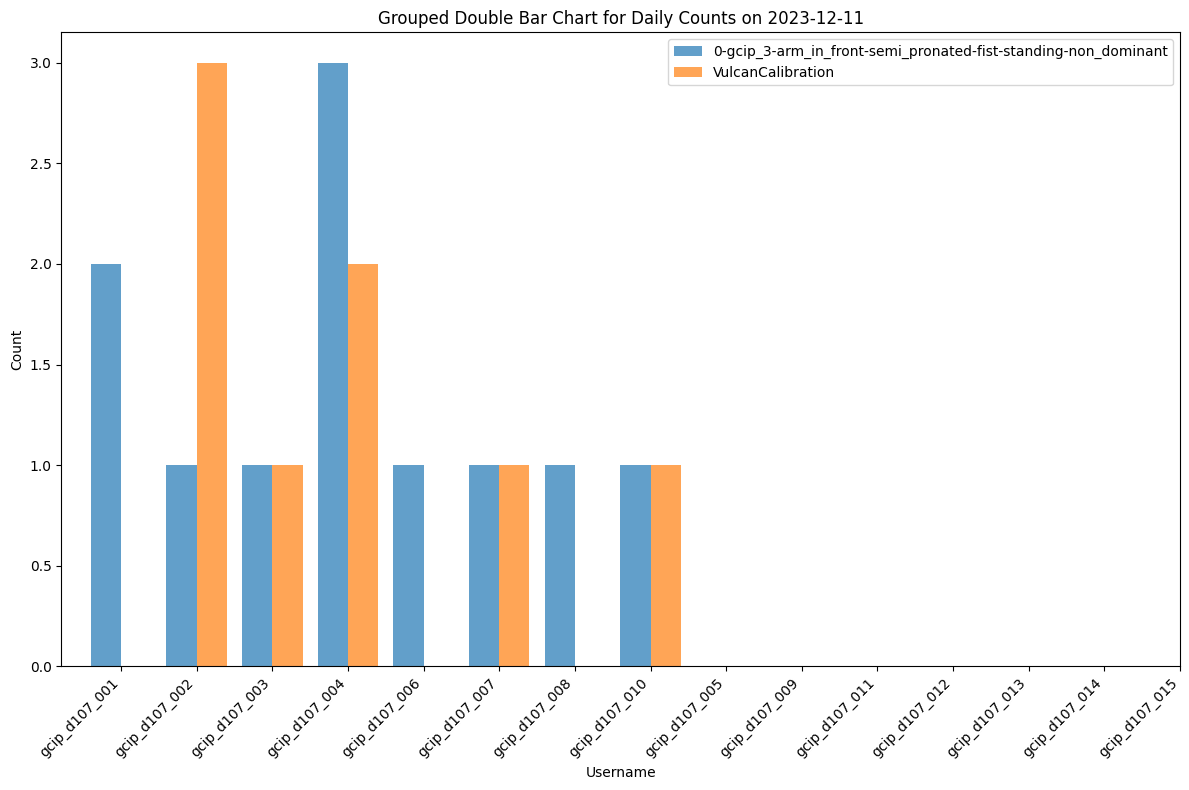

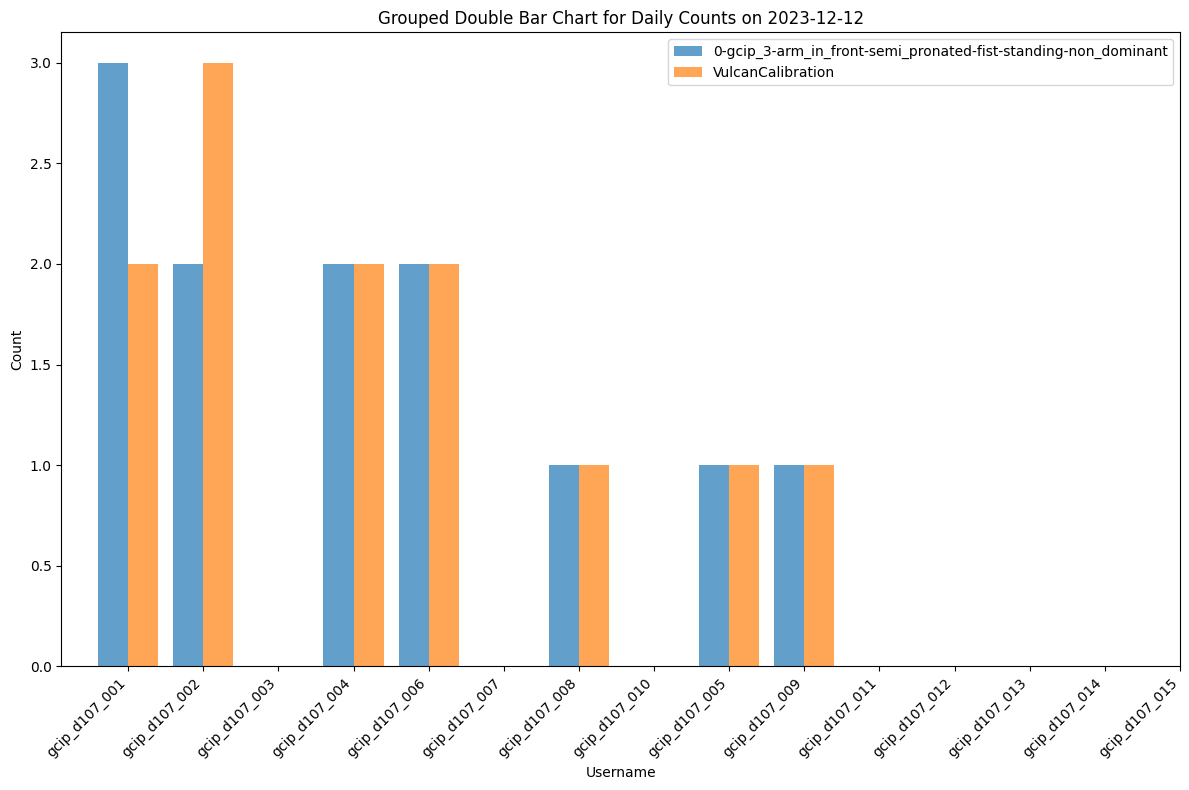

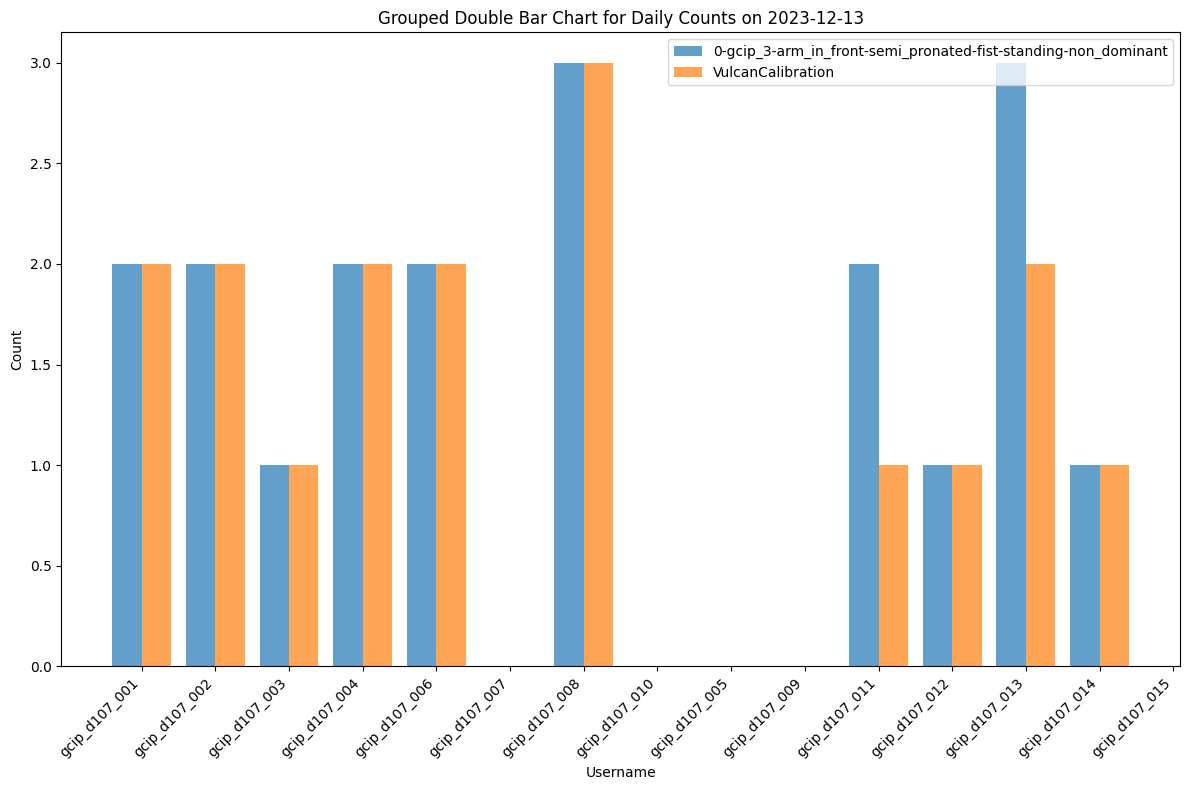

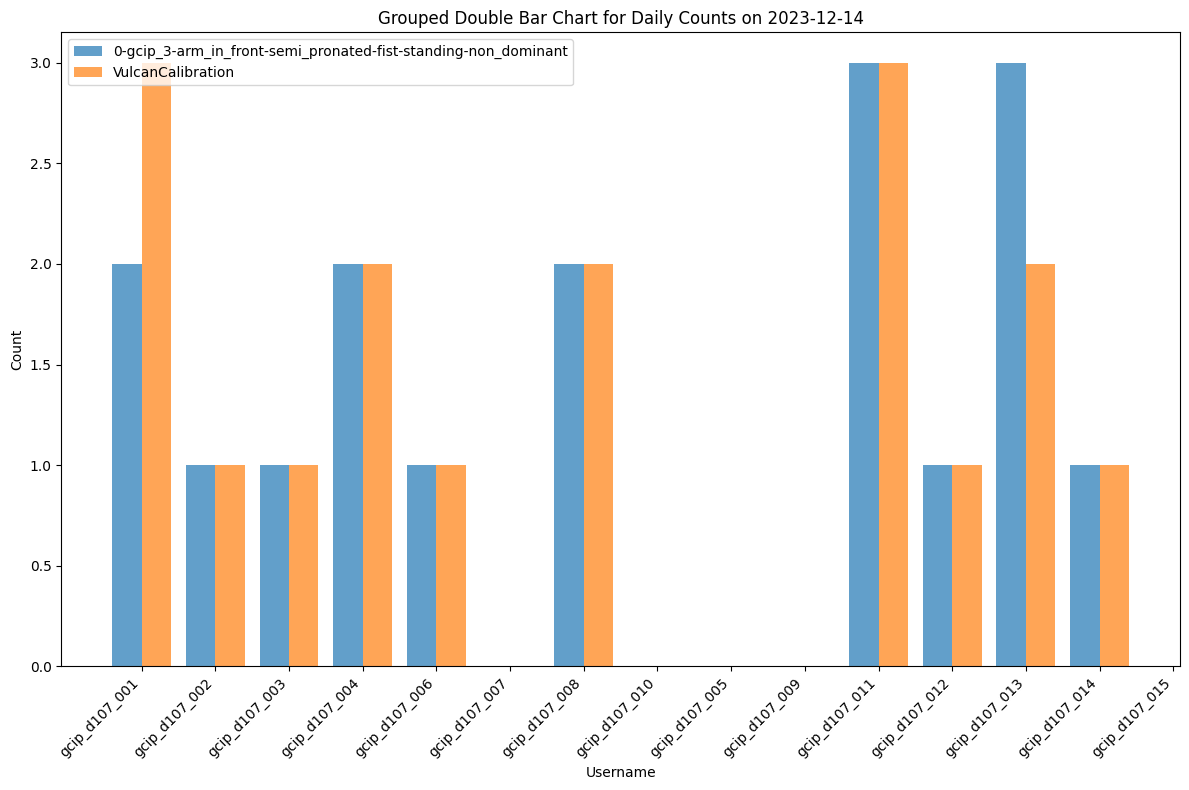

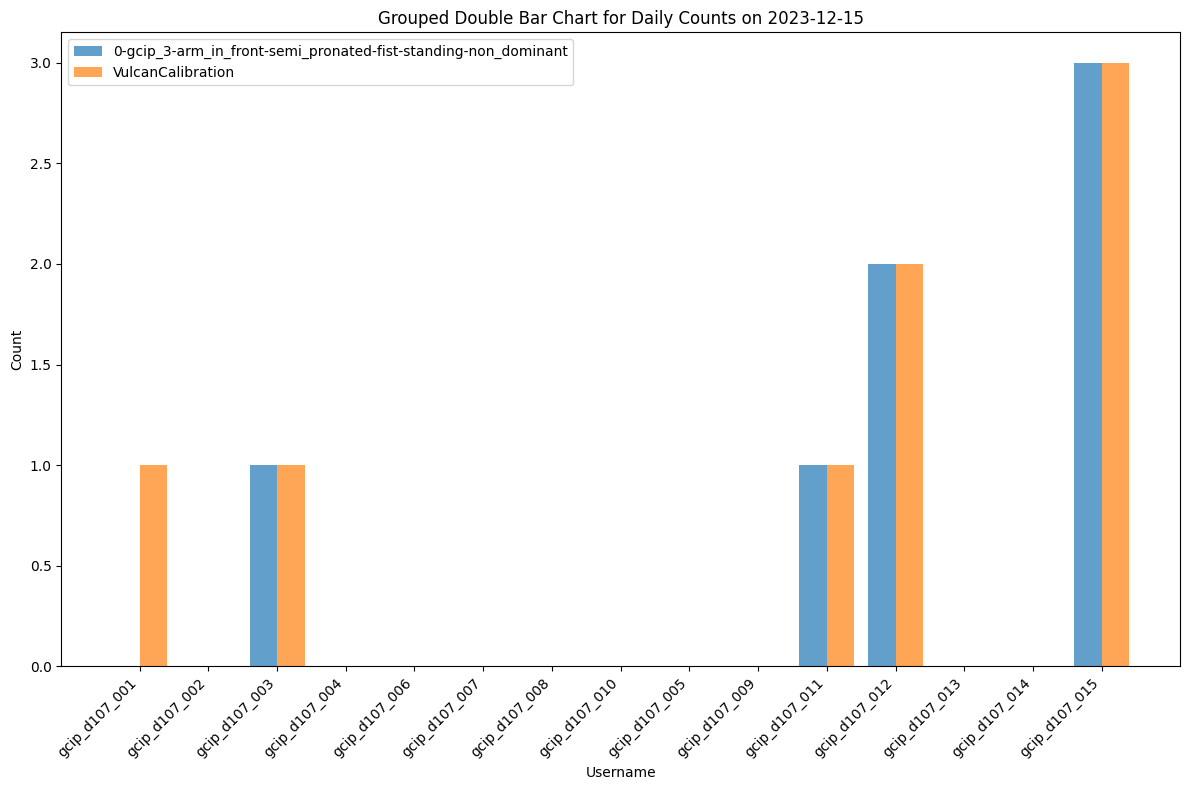

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the 'daily_count_by_user_protocol' DataFrame from the previous code
# If not, replace 'daily_count_by_user_protocol' with the appropriate DataFrame name

# Convert 'date' to datetime
daily_count_by_user_protocol['date'] = pd.to_datetime(daily_count_by_user_protocol['date'])

# Assign numerical values to each unique username
username_mapping = {username: i for i, username in enumerate(daily_count_by_user_protocol['username'].unique())}
daily_count_by_user_protocol['username_numeric'] = daily_count_by_user_protocol['username'].map(username_mapping)

# Group by 'date' and plot grouped double bar chart for each date
grouped_by_date = daily_count_by_user_protocol.groupby('date')

# Plot a grouped double bar chart for each date
for date, date_data in grouped_by_date:
    plt.figure(figsize=(12, 8))

    # Grouped double bar chart for '0-gcip_3-arm_in_front-semi_pronated-fist-standing-non_dominant' and 'VulcanCalibration'
    plt.bar(date_data['username_numeric'] - 0.2, date_data['0-gcip_3-arm_in_front-semi_pronated-fist-standing-non_dominant'],
            width=0.4, label='0-gcip_3-arm_in_front-semi_pronated-fist-standing-non_dominant', alpha=0.7)

    plt.bar(date_data['username_numeric'] + 0.2, date_data['VulcanCalibration'], width=0.4, label='VulcanCalibration',
            alpha=0.7)

    # Customize plot for each date and protocol
    plt.title(f'Grouped Double Bar Chart for Daily Counts on {date.strftime("%Y-%m-%d")}')
    plt.xlabel('Username')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right', ticks=np.arange(len(username_mapping)),
               labels=list(username_mapping.keys()))
    plt.legend()
    plt.tight_layout()
    plt.show()


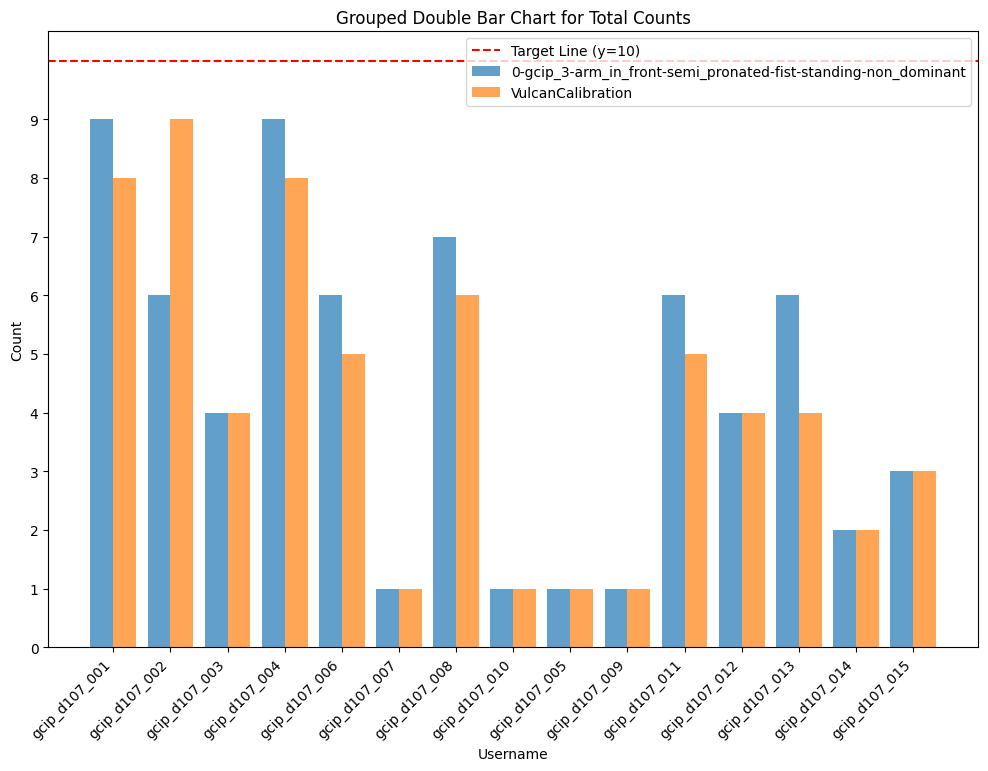

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the 'daily_count_by_user_protocol' DataFrame from the previous code
# If not, replace 'daily_count_by_user_protocol' with the appropriate DataFrame name

# Convert 'date' to datetime
daily_count_by_user_protocol['date'] = pd.to_datetime(daily_count_by_user_protocol['date'])

# Assign numerical values to each unique username
username_mapping = {username: i for i, username in enumerate(daily_count_by_user_protocol['username'].unique())}
daily_count_by_user_protocol['username_numeric'] = daily_count_by_user_protocol['username'].map(username_mapping)

# Group by 'username_numeric' and sum the counts for each protocol
grouped_by_user = daily_count_by_user_protocol.groupby('username_numeric').sum().reset_index()

# Create a single figure to hold the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Add a horizontal target line at y=10
target_line = 10

# Bar chart for '0-gcip_3-arm_in_front-semi_pronated-fist-standing-non_dominant'
ax.bar(grouped_by_user['username_numeric'] - 0.2, grouped_by_user['0-gcip_3-arm_in_front-semi_pronated-fist-standing-non_dominant'],
       width=0.4, label='0-gcip_3-arm_in_front-semi_pronated-fist-standing-non_dominant', alpha=0.7)

# Bar chart for 'VulcanCalibration'
ax.bar(grouped_by_user['username_numeric'] + 0.2, grouped_by_user['VulcanCalibration'], width=0.4, label='VulcanCalibration',
       alpha=0.7)

# Add a horizontal target line
ax.axhline(y=target_line, color='red', linestyle='--', label=f'Target Line (y={target_line})')

# Customize plot
ax.set_title('Grouped Double Bar Chart for Total Counts')
ax.set_xlabel('Username')
ax.set_ylabel('Count')
ax.set_yticks(np.arange(0, int(grouped_by_user[['0-gcip_3-arm_in_front-semi_pronated-fist-standing-non_dominant', 'VulcanCalibration']].values.max()) + 1))
ax.set_xticks(np.arange(len(username_mapping)))
ax.set_xticklabels(list(username_mapping.keys()), rotation=45, ha='right')  # Slant usernames
ax.legend()

# Save the figure
fig.savefig('grouped_double_bar_chart_total_counts_target_line.png')

# Show the plot
plt.show()


All time series plots have been saved to time_series_plots/all_time_series_plots.png


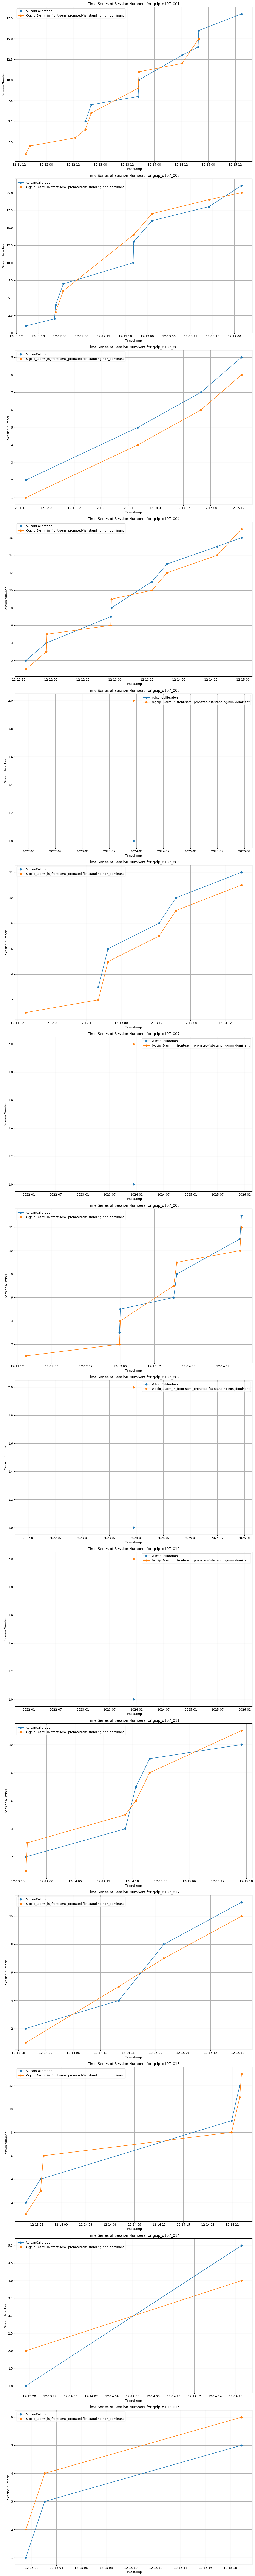

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from pathlib import Path

# Read the merged data from the CSV file
result_df = pd.read_csv('data_quality_external.csv')

# Convert 'startDate' to datetime
result_df['startDate'] = pd.to_datetime(result_df['startDate'])

# Sort the DataFrame by 'username' and 'startDate'
result_df.sort_values(by=['username', 'startDate'], inplace=True)

# Group by 'username' and 'startDate', then calculate the session number for each user
result_df['session_number'] = result_df.groupby('username').cumcount() + 1

# Create a directory to save the images
output_directory = Path('time_series_plots')
output_directory.mkdir(exist_ok=True)

# Create a single image for all time series plots
fig, axes = plt.subplots(nrows=len(result_df['username'].unique()), figsize=(12, 8 * len(result_df['username'].unique())))

for ax, (username, user_data) in zip(axes, result_df.groupby('username')):
    # Plot the first line for 'VulcanCalibration'
    ax.plot(user_data[user_data['protocol'] == 'VulcanCalibration']['startDate'],
            user_data[user_data['protocol'] == 'VulcanCalibration']['session_number'],
            marker='o', label='VulcanCalibration')

    # Plot the second line for '0-gcip_3-arm_in_front-semi_pronated-fist-standing-non_dominant'
    ax.plot(user_data[user_data['protocol'] == '0-gcip_3-arm_in_front-semi_pronated-fist-standing-non_dominant']['startDate'],
            user_data[user_data['protocol'] == '0-gcip_3-arm_in_front-semi_pronated-fist-standing-non_dominant']['session_number'],
            marker='o', label='0-gcip_3-arm_in_front-semi_pronated-fist-standing-non_dominant')

    # Customize the plot for the current user
    ax.set_title(f'Time Series of Session Numbers for {username}')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Session Number')
    ax.legend()
    ax.grid(True)

# Adjust layout and save the plot as an image
plt.tight_layout()
output_file_path = output_directory / 'all_time_series_plots.png'
plt.savefig(output_file_path)

# Inform the user about the saved image
print(f"All time series plots have been saved to {output_file_path}")


In [36]:
import pandas as pd

# List of protocols to check
protocols_to_check = ['VulcanCalibration', '0-gcip_3-arm_in_front-semi_pronated-fist-standing-non_dominant']

# Create a DataFrame from the sample data
df = unpacked_df

# Initialize columns 'protocol_done' and 'is_first_occurrence' with False
df['protocol_done'] = False
df['is_first_occurrence'] = False

# Group the data by 'username'
grouped = df.groupby(['username', 'protocol'])

# Create an empty DataFrame to store results
result_df = pd.DataFrame(columns=['username', 'protocol', 'count'])

# Iterate through each group
for (username, protocol), group in grouped:
    # Count the occurrences of the protocol being done
    protocol_count = group['protocol'].isin(protocols_to_check).sum()

    # Append the results to the result DataFrame
    result_df = result_df.append({'username': username, 'protocol': protocol, 'count': protocol_count}, ignore_index=True)

# Convert the 'count' column to integers
result_df['count'] = result_df['count'].astype(int)

# Reset the index of the result DataFrame
result_df = result_df.reset_index(drop=True)

# Print the updated DataFrame
print(result_df)

# Get the unique usernames from the original DataFrame
expected_usernames = ['brian.gormley@pison.com', 'curtis.saffo@pison.com', 'emily.fabius@pison.com', 'henry@pison.com', 'jun@pison.com', 'kate.stevenson@pison.com', 'keith.murray@pison.com', 'mike@pison.com', 'mohamed.martini@pison.com', 'ned.mccague@pison.com', 'ross.hoehn@pison.com', 'rscroggins@pison.com', 'sam@pison.com', 'samuel.kovaly@pison.com', 'tue.vu@pison.com']

# Add missing usernames to the result DataFrame with count set to 0
for username in expected_usernames:
    if username not in result_df['username'].unique():
        result_df = result_df.append({'username': username, 'protocol': '', 'count': 0}, ignore_index=True)

# Sort the result DataFrame by 'username'
result_df = result_df.sort_values(by='username')

merged_file_path = 'protocol_count_by_internal_user.csv'
result_df.to_csv(merged_file_path, index=False)

# Display a message to confirm the saved file
print(f"The protocol count by user has been saved to {merged_file_path}")


         username                                           protocol  count
0   gcip_d107_001  0-gcip_3-arm_in_front-semi_pronated-fist-stand...      9
1   gcip_d107_001                         9-gcip_3----walking_rifle-      0
2   gcip_d107_001                                  VulcanCalibration      8
3   gcip_d107_002  0-gcip_3-arm_in_front-semi_pronated-fist-stand...      6
4   gcip_d107_002                                  VulcanCalibration      9
5   gcip_d107_003  0-gcip_3-arm_in_front-semi_pronated-fist-stand...      4
6   gcip_d107_003                                  VulcanCalibration      4
7   gcip_d107_004  0-gcip_3-arm_in_front-semi_pronated-fist-stand...      9
8   gcip_d107_004                                  VulcanCalibration      8
9   gcip_d107_005  0-gcip_3-arm_in_front-semi_pronated-fist-stand...      1
10  gcip_d107_005                                  VulcanCalibration      1
11  gcip_d107_006  0-gcip_3-arm_in_front-semi_pronated-fist-stand...      6
12  gcip_d10